<a href="https://colab.research.google.com/github/VisionLogic-AI/Unsupervised_learning/blob/master/Unsupervised_Learning_ML(Dimensionality_Reduction_Algorithms)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before we begin exploring unsupervised learning alogorithms in detail, we will review how to set up and manae ML projects.
This is only for review purposes as you should already have an idea of how all of this works.

#Clone Unsupervised Learning Github Repo

In [1]:
!git clone https://github.com/aapatel09/handson-unsupervised-learning.git

Cloning into 'handson-unsupervised-learning'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 459 (delta 14), reused 21 (delta 5), pack-reused 410
Receiving objects: 100% (459/459), 93.79 MiB | 35.91 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [2]:
%tensorflow_version 1.x
!pip install tensorflow  as tf

TensorFlow 1.x selected.
  Created wheel for tf: filename=tf-1.0.0-cp36-none-any.whl size=1286 sha256=b29afcc86953ba0fa8d9416bfe25bbe54ae425f78b92091260614e4a6a87ad4b
  Stored in directory: /root/.cache/pip/wheels/7c/51/42/b034446bd6c8252825a1a0e7799b6ff633de376967db5ed5a6
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=779af97c110a01b1cc44cf62612f329a8f5293a06ec7c3e0973ea04d4b6e0847
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built tf gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


In [3]:
!pip install keras
!pip install xgboost
#the boom wants a particular version of xgboost install but that will have to be conducted on the local drive...not the cloud

In [4]:
#Install another version of gradient boosting, Microsofts LightGBM
!pip install lightgbm

#Clustering Algorithms
Lets install a few clustering algorithms.
  - fastcluster
  - hdbscan
  - and one for time series clustering (tslearn)

In [5]:
!pip install fastcluster
!pip install hdbscan
!pip install tslearn

     |████████████████████████████████| 163kB 4.7MB/s 
     |████████████████████████████████| 4.7MB 4.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2308888 sha256=ef6aa8d84c744f9a4a2f42e9f64581a54248e0596dd75730abfc792b39e4e1ea
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan
     |████████████████████████████████| 747kB 4.9MB/s 


#Dimensionality Reduction
What is dimensionality reduction?
The ability to shrink the size of a dataset because the feature space is too large.
*Important: 
Dimensionality reduction algorithms project high-dimensional data to a low dimensional space, retaining as much salient information as possible while removing redundant information.

Once the data has been converted into a low-dimentional space, ML algorithms are able to identify interesting patterns "more effectively and efficiently" because a lot of the noise has been reduced.

Sometime DR is the goal itself, for example, building an anamoly detection system.

Other times, DR IS NOT the goal, but rather a means to another end.
For ex.) DR is part of the ML pipeline to help solve large-scale, computationally complex problems such as:
- images
- video
- speech and text

In [6]:
import numpy as np
import pandas as pd
import os, time
import pickle, gzip
import matplotlib.pyplot as plt
import seaborn as sns
color= sns.color_palette()
import matplotlib as mpl

%matplotlib inline

from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from numpy.testing import assert_array_almost_equal
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Load Dataset
In this example we are going to use the famous mnist dataset for this unsupervised problem

In [7]:
#load datasets
#current_path= os.getcwd()
file= '/content/handson-unsupervised-learning/datasets/mnist_data/mnist.pkl.gz'
f= gzip.open(file, 'rb')
train_set, validation_set, test_set= pickle.load(f, encoding= 'latin1')
f.close()
x_train, y_train= train_set[0], train_set[1]
x_validation, y_validation= validation_set[0], validation_set[1]
x_test, y_test= test_set[0], test_set[1]

#verify shape of datasets
print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of x_validation:', x_validation.shape)
print('Shape of y_validation:', y_validation.shape)
print('Shape of x_test:', x_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of x_train: (50000, 784)
Shape of y_train: (50000,)
Shape of x_validation: (10000, 784)
Shape of y_validation: (10000,)
Shape of x_test: (10000, 784)
Shape of y_test: (10000,)


#Create Pandas Dataframes for the Datasets
Lets convert the numpy arrays into pandas dataframes so they are easier to explore and work with.

In [8]:
train_index= range(0, len(x_train))
validation_index= range(len(x_train),
                        len(x_train)+len(x_validation))
test_index= range(len(x_train)+len(x_validation),
                  len(x_train)+len(x_validation)+len(x_test))
x_train= pd.DataFrame(data= x_train, index= train_index)
y_train= pd.Series(data= y_train, index=train_index)
x_validation= pd.DataFrame(data= x_validation, index= validation_index)
y_validation= pd.Series(data= y_validation, index= validation_index)
x_test= pd.DataFrame(data= x_test, index= test_index)
y_test= pd.Series(data= y_test, index= test_index)

#explore the data by describing the training matrix
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000010,0.000037,0.000017,7.031250e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.000004,0.000044,0.000108,0.000155,0.000210,0.000380,0.000570,...,0.013975,0.010081,0.006603,0.003967,0.002168,0.001039,0.000333,0.000067,2.343750e-07,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,0.000067,0.000173,0.000377,0.000501,0.000709,0.001159,0.001440,0.001910,0.002044,0.002479,0.002171,0.001725,0.001215,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002034,0.005825,0.003773,1.572223e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000280,0.000833,0.004514,0.008921,0.010814,0.012095,0.016715,0.020658,...,0.102319,0.086386,0.070681,0.054545,0.041041,0.027224,0.014586,0.005078,5.240772e-05,0.001031,0.0,0.0,0.0,0.0,0.0,0.0,0.001872,0.007228,0.010340,0.016519,0.019057,0.023204,0.027897,0.032083,0.037493,0.037788,0.042872,0.039894,0.034695,0.029488,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

As we can see many of the values are zero, meaning most of the pixels in the images are black.
The labels data is a one dimensional vector representing the actual content in the image.
Labels for the first few images are as follows:

In [9]:
#show the labels
y_train.head()

0    5
1    0
2    4
3    1
4    9
dtype: int64

#Display the Images

In [0]:
def view_digit(example):
  label= y_train.loc[example]
  image= x_train.loc[example, :].values.reshape([28, 28])
  plt.title('Example: %d Label: %d' % (example, label))
  plt.imshow(image, cmap= plt.get_cmap('gray'))
  plt.show()

#Dimensionality Reduction Alogorithms
For each algorithm, we will introdce the concept first and then build deeper understanding by applying the algorithm to the mnist dataset.

There are two primary types of dimensionality reduction algorithms:
- linear projection
- manifold learning

#Linear Projection Class of Algoeithms (Dimensionality Reduction)
Below is a list of linear projection algorithms within the family of dimenionality reduction algorithms:
- PCA
- Singular Value Decomposition
- Random projection

*Be sure to perform feature scaling before running PCA. (Range between 0-1) **bold text**
The MNIST dataset that we ware working with already has the data rescaled, so we do not have to worry about it for this example.

#Manifold Learning Alogorithms (Dimensionality Reduction)
Below is a list of manifold learning types of algorithms within dimensionality reduction:
- Isomap: learning from a curved distance
- Multi dimensional scaling
- Locally linear embedding
- TSNE
- Random trees embedding
- Independent component analysis

In [0]:
#PCA in practice on the mnist digits dataset
#set hyperparameters

from sklearn.decomposition import PCA

n_components= 784     #784 is the dimensional space from dataset
whiten= False
random_state= 2018
pca= PCA(n_components= n_components, whiten= whiten, 
         random_state= random_state)

Apply PCA

We will set the number of principle components to the original number of dimensions.
Then PCA will capture the salient information from the "original" dimensions and start generating principle components.
Once those are generated, we will detemrine "how many" principle components we need to effectively capture most of the variance/information from the original feature set.

In [0]:
#Lets fit and transform our training data, generating new principle components
x_train_pca= pca.fit_transform(x_train)
x_train_pca= pd.DataFrame(data= x_train_pca, index= train_index)

Evaluate PCA

Because we have not yet reduce the dimensionality at all (we've just transformed the data) the variance/information of the original data captured by the 784 principle components should be 100%

In other words, all of the original features should be 10% captured seeing that the data has not yet been effected by our dimensionality reduction technique.

In [13]:
#Percentage of variance captured by 784 principal components
print("Variance Explained by all 784 prinicpal component: ", sum(pca.explained_variance_ratio_))

Variance Explained by all 784 prinicpal component:  1.0000000252108534


It is important to note the importance of the 784 principal components varies quite a bit as we are about to see in the next few examples.

In [14]:
#Percentage of variance captured by x principal components
importanceOfPrincipalComponents= pd.DataFrame(data= pca.explained_variance_ratio_)
importanceOfPrincipalComponents= importanceOfPrincipalComponents.T
print('Variance Captured by First 10 principal Components: ', importanceOfPrincipalComponents.loc[:, 0:9].
      sum(axis=1).values)
print('Variance Captured by first 20 principal Components:', importanceOfPrincipalComponents.loc[:, 0:19].
      sum(axis=1).values)
print('Variance Captured by First 50 PrincipalComponents: ', importanceOfPrincipalComponents.loc[:,0:49].
      sum(axis=1).values)
print('Variance Captured by first 100 PrincipalComponents:', importanceOfPrincipalComponents.loc[:, 0:99].
      sum(axis= 1).values)
print('Variance Captured by first 200 PrincipalComponents:', importanceOfPrincipalComponents.loc[:, 0:199].
      sum(axis= 1).values)
print('Variance Captured by First 300 Principal Components: ', importanceOfPrincipalComponents.loc[:, 0:299].sum
      (axis= 1).values)


Variance Captured by First 10 principal Components:  [0.48876244]
Variance Captured by first 20 principal Components: [0.6439803]
Variance Captured by First 50 PrincipalComponents:  [0.824861]
Variance Captured by first 100 PrincipalComponents: [0.91465855]
Variance Captured by first 200 PrincipalComponents: [0.96650076]
Variance Captured by First 300 Principal Components:  [0.9862489]


As we can see, the first 10 components in total capture approx 50% of the variance
- the first 100 components over 90%
- and the first 300 components almost 99% of the variance

*The information in the rest of the principal components is of negligible value. (The remaining 484 out of 784)

PCA allows us to reduce the dimensionality of the original data substantially while retaining most of the salient information.
On the PCA reduced feature set, other machine learning alogorithms (downstream in the ML pipeline) - will have an easier time seperating the data points in space (to perform tasks such as anomaly detection and clustering) and will require fewer computational resources.

#Visualize the Seperaation of Points in Space
Lets plots the observations in two dimensions in order to demonstrate the power of PCA to effienctly and compactly capture the variacnce/information.

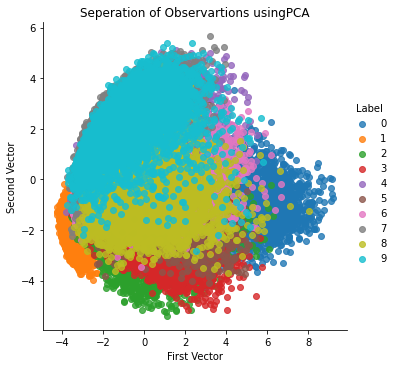

In [15]:
def scatterPlot(xDF, yDF, algoName):
  tempDF= pd.DataFrame(data= xDF.loc[:, 0:1], index= xDF.index)
  tempDF= pd.concat((tempDF, yDF), axis=1, join= 'inner')
  tempDF.columns= ['First Vector', 'Second Vector', 'Label']
  sns.lmplot(x= 'First Vector', y= 'Second Vector', hue= 'Label', data= tempDF, fit_reg= False)
  ax= plt.gca()
  ax.set_title('Seperation of Observartions using'+algoName)
scatterPlot(x_train_pca, y_train, 'PCA')

As we can see, by using only two principal components, PCA does a good job of seperating the point in space such that the simlar points are generally closer to each other than they are other, less similar points.

In other words, images of the same digit are closer to each other than images that are not the same.

*PCA ACCOMPLISHES THIS WITHOUT USING ANY LABELS WHATSOEVER!

This demonstrates the power of unsupervised learning to capture the underlying structures of data, helping discover hidden patterns in the absence of labels.

If we were to try to accomplish the same goal using "supervised learning algorithms, the separation would be poor at best.



#Incremental PCA (Very Large Datasets)
This algorithm is used for very large datasets and cannot fit in memory.
What this algorithm does is perform PCA incrementally in small batches, where each batch is able to fit into memory.
*The batch size can be either set manually or determined automatically.

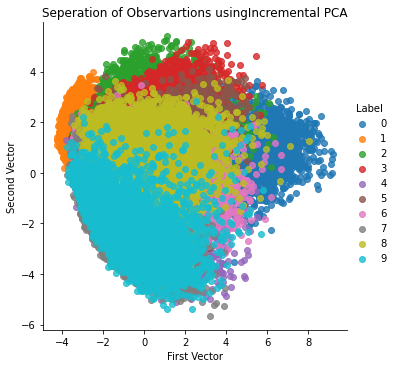

In [16]:
#Incremental PCA
from sklearn.decomposition import IncrementalPCA

n_components= 784
batch_size= None

incremental_PCA= IncrementalPCA(n_components= n_components, batch_size= batch_size)
x_train_incrementalPCA= incremental_PCA.fit_transform(x_train)
x_train_incrementalPCA= pd.DataFrame(data= x_train_incrementalPCA, index= train_index)
x_validation_incremental_PCA= incremental_PCA.transform(x_validation)
x_validation_incremental_PCA= pd.DataFrame(data= x_validation_incremental_PCA, index= validation_index)

scatterPlot(x_train_incrementalPCA, y_train, 'Incremental PCA')

#Sparse PCA
This algorithm is primarily used for reducing the original feature space to some degree but not as compactly as the orignal PCA algorithm.
For some ML problems, some degreee of sparsity may be preferred.

Beause this algorithm trains a bit more slowly than the original PCA, we will train on just the fist 10,000 examples in our training set (out of the total 50,000 examples).
*We should continue this practice of training on a fewer than the total number of examples when the training time for an alogorithm is slow. 

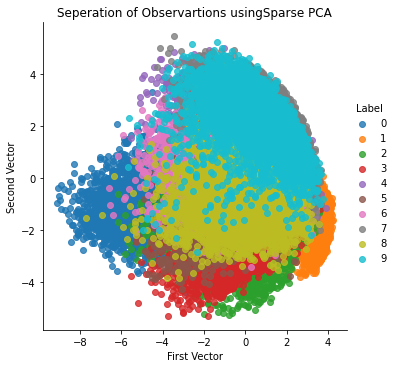

In [17]:
#Sparse PCA
from sklearn.decomposition import SparsePCA

n_components= 100
alpha= 0.0001
random_state= 2018
n_jobs= -1

sparse_pca= SparsePCA(n_components= n_components, alpha= alpha,
                      random_state= random_state, n_jobs= n_jobs)
sparse_pca.fit(x_train.loc[:10000,:])
x_train_sparsepca= sparse_pca.transform(x_train)
x_train_sparsepca= pd.DataFrame(data= x_train_sparsepca, index= train_index)

x_validation_sparsePCA= sparse_pca.transform(x_validation)
x_validation_sparsePCA= pd.DataFrame(data= x_validation_sparsePCA, index= validation_index)

scatterPlot(x_train_sparsepca, y_train, 'Sparse PCA')

#Kernel PCA
This is the non-linear form of PCA which runs a similarity function over pairs of original data points in order to perform "non linear dimensionality reduction".

By using the similarity function (known as the kernel methodl), Kernel PCA maps the "implicit feature space" where the majority of data points lie and creates this implicit feature space in a much small number of dimensions than the dimensions in the original feature set.
*This method is especially effective when the original feature set IS NOT linearly seperable.

For the Kernel PCA algorithm, we need to set the number of components we desire, the type of kernel, and the kernel coefficient, which is known as the gamma.
*The most popular kernel is the 'radial basis function kernel" referred to as the RBF kernel.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


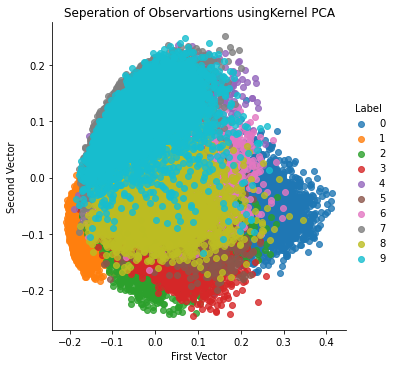

In [18]:
#Kernel PCA
from sklearn.decomposition import KernelPCA

n_components= 100
kernel = 'rbf'
gamma= None
random_state= 2018
n_jobs= 1

kernel_pca= KernelPCA(n_components= n_components, kernel= kernel,
                      gamma= gamma, n_jobs= n_jobs, random_state= random_state)
kernel_pca.fit(x_train.loc[:10000,:])
x_train_kernel_pca= kernel_pca.transform(x_train)
x_train_kernel_pca= pd.DataFrame(data= x_train_kernel_pca, index= train_index)

x_validation_kernel_pca= kernel_pca.transform(x_validation)
x_validation_kernel_pca= pd.DataFrame(data= x_validation_kernel_pca, index= validation_index)

scatterPlot(x_train_kernel_pca, y_train, 'Kernel PCA')

The two dimensional scatterplot of the kernel PCA is nearly identical to the one of the linear PCA for our MNist digits dataset.

#Singular Value Decomposition
Another approach to learning the underlying structure of the data is to reduce the rank of the original matrix of features to a smaller rank such that the original matrix can be recreated using a linear combination of some of the vectors in the smaller rank matrix.
*This approach is very similar to PCA

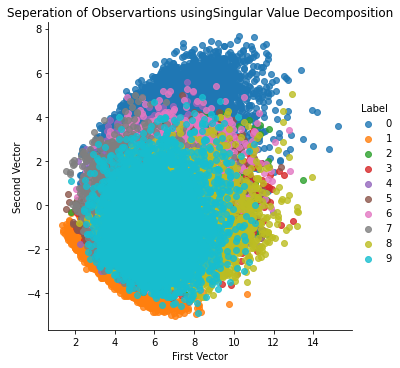

In [19]:
#Singular Value Decomposition
from sklearn.decomposition import TruncatedSVD

n_components= 200
algorithm= 'randomized'
n_iter= 5
random_state= 2018

svd= TruncatedSVD(n_components= n_components, algorithm= algorithm,
                  n_iter= n_iter, random_state= random_state)

x_train_svd= svd.fit_transform(x_train)
x_train_svd= pd.DataFrame(data= x_train_svd, index= train_index)

x_validation_svd= svd.transform(x_validation)
x_validation_svd= pd.DataFrame(data= x_validation_svd, index= validation_index)

scatterPlot(x_train_svd, y_train, 'Singular Value Decomposition')


#Random Projection
Another linear dimensionality reduction technique is random projection, which relier on Johnson-Lindenstrauss lemma.

According to Johnson, points in a high dimensional space can be embedded into a much lower dimesnional space so that distances between the points are nearly preserved.
*In other words, even as we move from high-dimensional space, the relevant structure of the original feature set is preserved.

There are two versions of random projection: 
- Gaussian Random Projection: the standard version which where we can either specify the number of components we would like to have in the reduced feature space, or we can set the hyperparameters to eps.
(The eps controls the quality of the embedding according to Johnson, where smaller values generate higher number of dimensions)

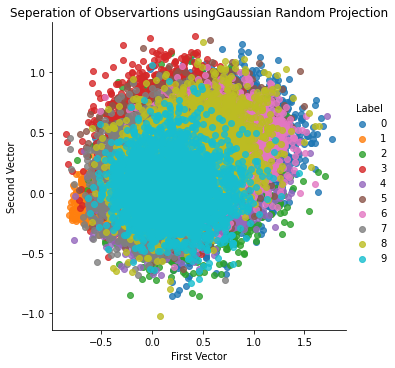

In [20]:
#Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

n_components= 'auto'
eps= 0.5
random_state= 2018

grp= GaussianRandomProjection(n_components= n_components, eps= eps,
                              random_state= random_state)
x_train_grp= grp.fit_transform(x_train)
x_train_grp= pd.DataFrame(data= x_train_grp, index= train_index)

x_validation_grp= grp.transform(x_validation)
x_validation_grp= pd.DataFrame(data= x_validation_grp, index= validation_index)

scatterPlot(x_train_grp, y_train, 'Gaussian Random Projection')

Although it is a form of linear projection like PCA, random projection is an entirely different family of dimensionality reduction.

#Sparse Random Projection
Just as there is SparsePCA, there is a version of random projection known as sparse random projection.
It retains some degree of sparsity in the transformed feature set and is generally much more efficient, transforming the oringinal data into the reduced space MUCH FASTER than the normal gaussian random projection above.


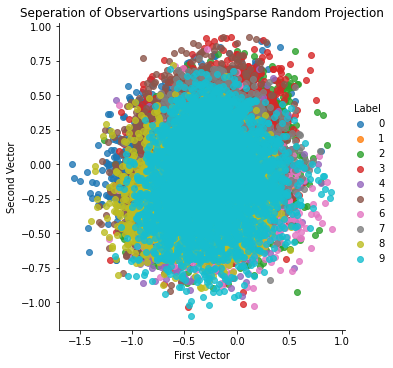

In [21]:
#Sparse Random Projection
from sklearn.random_projection import SparseRandomProjection

n_components= 'auto'
density= 'auto'
eps= 0.5
dense_output= False
random_state= 2018

srp= SparseRandomProjection(n_components= n_components, density= density,
                            eps= eps, dense_output= dense_output, random_state= random_state)
x_train_srp= srp.fit_transform(x_train)
x_train_srp= pd.DataFrame(data= x_train_srp, index= train_index)

x_validation_srp= srp.transform(x_validation)
x_validation_srp= pd.DataFrame(data = x_validation_srp, index= validation_index)

scatterPlot(x_train_srp, y_train, 'Sparse Random Projection')

#Isomap (Manifold Learning)
Instead of lienarly projecting the data from a high-dimensional spaxe to a low dimensional space, we can use non-linear dimensionality reduction methods known as manifold learning

The most vanilla form of manifold learning is known as isometric mapping or Isomap for short.

Like kernel PCA, Isomap learns a new, low-dimensional embedding of the original feature set by calculating the pairwise distances of all the points, where distance is curved or geodesic distance rahther Euclidean distance.
*In other words, it learns the intrinsic geometry of the original data based on where each point lies relative to its neighbors on a manifold

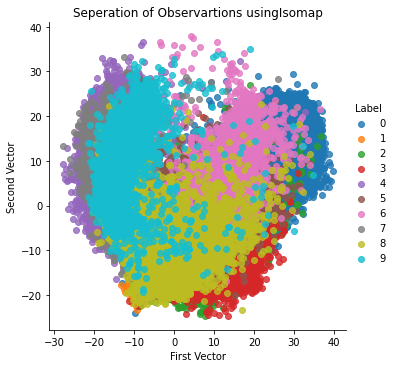

In [22]:
#Isomap
from sklearn.manifold import Isomap 

n_neighbors = 5
n_components= 10
n_jobs= 4

isomap= Isomap(n_neighbors= n_neighbors, n_components= n_components,
               n_jobs= n_jobs)
isomap.fit(x_train.loc[:5000,:])
x_train_isomap= isomap.transform(x_train)
x_train_isomap= pd.DataFrame(data= x_train_isomap, index= train_index)

x_validation_isomap= isomap.transform(x_validation)
x_validation_isomap= pd.DataFrame(data= x_validation_isomap, index = validation_index)

scatterPlot(x_train_isomap, y_train, 'Isomap')

#Multi Dimensional Scaling
MDS is a form of non-linear dimensionality reduction that learns the simialirity of points in the original dataset and, using this similarity learning, models this is a lower dimensional space.

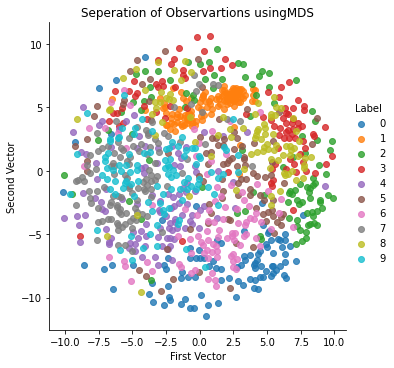

In [23]:
#MDS
from sklearn.manifold import MDS

n_components= 2
n_init= 12
max_iter= 1200
metric = True
n_jobs= 4
random_state= 2018

mds= MDS(n_components= n_components, n_init= n_init, max_iter= max_iter,
         metric= metric, n_jobs= n_jobs, random_state= random_state)
x_train_mds= mds.fit_transform(x_train.loc[0:1000:])
x_train_mds= pd.DataFrame(data= x_train_mds, index= train_index[0:1001])

scatterPlot(x_train_mds, y_train, 'MDS')

#Locally Linear Embedding (LLE)
LLE is another popular non-linear reduction method that preserves the distance with in local neighborhoods as it projects the data from the original feature space to the reduced space.

LLE discovers tje non linear structure in the original, high dimensional data by segmenting the data into smaller components and modeling each component as a linear embedding.

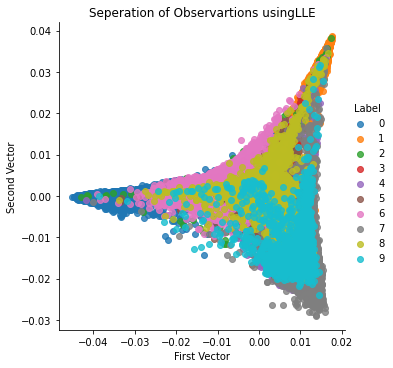

In [24]:
#Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding

n_neighbors= 10
n_components= 2
method= 'modified'
n_jobs= 4
random_state= 2018

lle= LocallyLinearEmbedding(n_neighbors= n_neighbors, n_components= n_components,
                            method= method, random_state= random_state,
                            n_jobs= n_jobs)
lle.fit(x_train.loc[0:5000,:])
x_train_lle= lle.transform(x_train)
x_train_lle= pd.DataFrame(data= x_train_lle, index= train_index)

x_validation_lle= lle.transform(x_validation)
x_validation_lle= pd.DataFrame(data= x_validation_lle, index= validation_index)

scatterPlot(x_train_lle, y_train, 'LLE')

#t- Distributed Stochatic Embedding (t-SNE)
t-SNE is a non linearn dimensionality reduction technique for visualizing high dimensional data.

t-SNE accomplishes this by by modeling each high dimensional point into a two or three dimensional space, where simlar points are modeled close to each other and dissimilar points are modeled farther away.

It does this by constructing two probability distributions , one over pairs of points in the low dimensional space such that the similar points have a high probability and disimilar points have a lower probability.

In real world applications of t-SNE, it is best to use another dimensionality reduction technique (such as PCA) to reduce the number of dimensions before applying t-SNE.

By applying applying another form of dimensionality reduction first, we reduce the noise in the features that are fed into t-SNE and speed up the computation of the alogorithm.

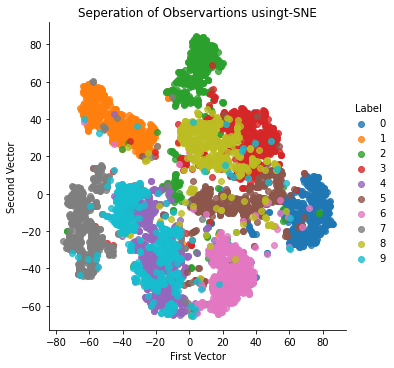

In [25]:
#t-SNE
from sklearn.manifold import TSNE

n_components= 2
learning_rate= 300
perplexity= 30
early_exaggeration= 12
init= 'random'
random_state= 2018

tsne= TSNE(n_components= n_components, learning_rate= learning_rate,
           perplexity= perplexity, early_exaggeration= early_exaggeration,
           init= init, random_state= random_state)
x_train_tsne= tsne.fit_transform(x_train_pca.loc[:5000,:9])
x_train_tsne= pd.DataFrame(data= x_train_tsne, index= train_index[:5001])

scatterPlot(x_train_tsne, y_train, 't-SNE')

t-SNE has a nonconvex cost function, which means that different initializations of the algorithm will generate different results.
There is no stable solution.

#Other Dimensionality reduction Methods
Below are methods that do not rely on any sort of geometry or distance metric.


#Dictionary Learning
Learns the sparse representation of the original data.
The resulting matrix is known as the dictionary, and the vectors in the dictionary are known as atoms.

Assuming there are d features i the original data and n atoms in the dictionary, we can have a dictionary that is either undercomplete , where n < d, or overcomplete, where n > d.

The undercomplete dictionary achieves dimensionality reduction, representing the original data and with fewer number of vectors, which is what we will focus on.

There is a mini batch version of dictionary learning that we will apply to our dataset of digits. 
*As with toher dimensionality reduction methods, we will set the number of components. We will also set the batch size and the number of iterations to perform the training.

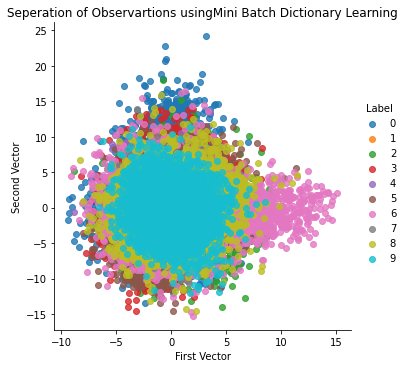

In [26]:
#mini batch dictionary learning
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components= 50
alpha= 1
batch_size= 200
n_iter= 25
random_state= 2018

minibatchdictlearning= MiniBatchDictionaryLearning(n_components= n_components,
                                                   alpha= alpha, batch_size= batch_size,
                                                   n_iter= n_iter, random_state= random_state)
minibatchdictlearning.fit(x_train.loc[:,:10000])
x_train_minibatchdictlearning= minibatchdictlearning.fit_transform(x_train)
x_train_minibatchdictlearning= pd.DataFrame(data= x_train_minibatchdictlearning, 
                                            index= train_index)

x_validation_minibatch_dictlearning= minibatchdictlearning.transform(x_validation)
x_validation_minibatch_dictlearning= pd.DataFrame(data= x_validation_minibatch_dictlearning,
                                                  index = validation_index)

scatterPlot(x_train_minibatchdictlearning, y_train, "Mini Batch Dictionary Learning")

#Independent Component Analysis(ICA)
One common problem with unlabeled data is that there are many independent signals embedded together into features we are given.

Using ICA, we can separate these blended signals into their individual components.

After the separation is complete, we can reconstruct any of the original features by adding togher some combination of the individual components we generate.
*ICA is commonly used in signal processing tasks (for example, to identify the individual voices in an audio clip of a busy coffeehouse)


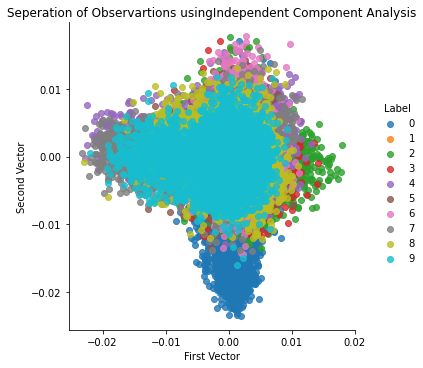

In [27]:
#Independent Component Analysis
from sklearn.decomposition import FastICA

n_components= 25
algorithm= 'parallel'
whiten= True
max_iter= 100
random_state= 2018

fastica= FastICA(n_components= n_components, algorithm= algorithm,
                 whiten= whiten, max_iter= max_iter,
                 random_state= random_state)
x_train_fastica= fastica.fit_transform(x_train)
x_train_fastica= pd.DataFrame(data= x_train_fastica, index= train_index)

x_validation_fastica= fastica.transform(x_validation)
x_validation_fastica= pd.DataFrame(data= x_validation_fastica, index= validation_index)

scatterPlot(x_train_fastica, y_train, 'Independent Component Analysis')

#Conclusion
I've introduced and explored a number of dimensionality reduction algorithms starting with our linear methods such as PCA and random projection.

Then we switched to nonlinear methods, also known as manifold learning, such as: Isomap, multi dimensional scaling, LLE and t-SNE.

We also covered nondistance methods such as dictionary learning and ICA.

Dimensionality reduction captures the most salient information in a dataset in a small number of dimensions by learning the underlying structure of the data and it does this without using any data.